In [ ]:
import nltk # Natural Language Toolkit
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import matplotlib.pyplot as plt
import re # Regular Expression
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# don't execute this code
import chardet # Chardet: The Universal Character Encoding Detector which Detects
                # ASCII, UTF-8, UTF-16 (2 variants), UTF-32 (4 variants), etc.
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

In [ ]:
file='/content/spam.csv'
#df = pd.read_csv(file,encoding='Windows-1252')
df = pd.read_csv(file,encoding='latin')

In [ ]:
df

In [ ]:
# EDA Rename columns
df.rename(columns={'v1':'class','v2':'text'},inplace=True)

In [ ]:
df

In [ ]:
#delete all Unnamed Columns in a single code of line using regex
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [ ]:
df

In [ ]:
df['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

In [ ]:
#replace ham with 0, spam with 1. instead of label encoder let us add one column
# if ham it will have 0 value else 1 value
df['label']=df['class'].map({'spam':1,'ham':0})

In [ ]:
df

In [ ]:
# find on an avg how many words are present in email if it belongs to ham or spam
# for that let us add one more column to put length of email (total no. of characters in mail)
df['length']=df['text'].apply(len)

In [ ]:
df

,class,text,label,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

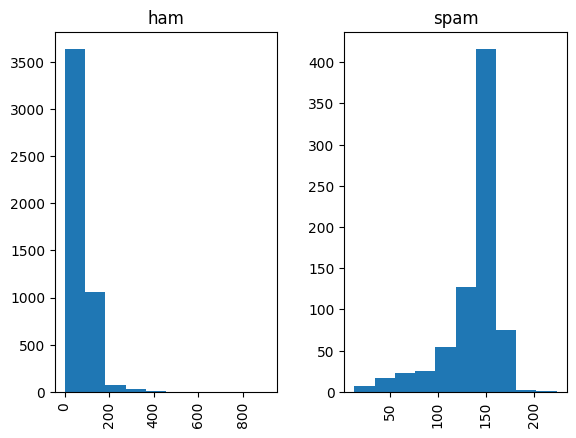

In [ ]:
df.hist(column='length',by='class')
# x axis= length (no. of characters in mail)
#length of spam email is greater than ham emails. i.e. spam mails have more words

In [ ]:
# in spam - most occuring words will be you won prize...etc
# find frequency of such words in ham and spam wordcloud -
# find which are the words which are occuring most of the times in spam and ham. So separate those dataframes
spam = df[df['label']==1]
ham = df[df['label']==0]

In [ ]:
spam

In [ ]:
ham

In [ ]:
#User defined function for plotting wordcloud

def wordcld(data,title): # pass dataset and what title you want for the wordcloud
  txt = ' '.join(data['text']) #join all sentences and convert it to paragraph
  txt = txt.lower() #normalization
  stop = STOPWORDS #stop will have entire list of stopwords

  wc = WordCloud(background_color='white',stopwords=stop).generate(txt)# inside generate()pass dataset for which you want to generate wordcloud
  plt.imshow(wc)
  plt.axis('off')# don't show numbers on x and y axis
  plt.title(title)
  #plt.show()

In [ ]:
wordcld(spam,'SPAM') # call to user defined function

In [ ]:
wordcld(ham,'HAM')

In [ ]:
lemma = WordNetLemmatizer()

In [ ]:
# Data Cleaning - remove special characters, nos, emojis
# in model building consider only use text and label column
corpus = []

for i in range(len(df)):
  msg = re.sub('[^a-zA-Z]',' ',df['text'][i])
  msg = msg.lower()
  msg = msg.split() #split() separate each word from sentence when space is there

  #list comprehension: i - each sentence
  msg = [lemma.lemmatize(i) for i in msg if not i in stopwords.words('english')]
  msg = ' '.join(msg)
  corpus.append(msg)

In [ ]:
corpus # each word is lemmatized and cleaned format

In [ ]:
# Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
cv = CountVectorizer()

x =  cv.fit_transform(corpus)
x = pd.DataFrame(x.toarray(),columns=cv.get_feature_names_out())
x
# columns = unique words 7021 independent features, rows=records i.e. no. of emails, target column = label

In [ ]:
y = df['label'] # ham - 0, spam - 1
y

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
nb = MultinomialNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
print(classification_report(ytest,ypred))
print(nb.score(xtrain,ytrain)) # Train accuracy
print(nb.score(xtest,ytest)) # Test accuracy

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       976
           1       0.89      0.96      0.93       139

    accuracy                           0.98      1115
   macro avg       0.94      0.97      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9919228180390397
0.9811659192825112


In [ ]:
# here naive bayes is giving 99% training and 98 % test accuracy. so its a generalized model
